In [39]:
# all imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 

In [40]:
# reading the csv file to use its data
df = pd.read_csv("CarDetails.csv") 

# Returns first five entries of dataset 
df.head() 

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [41]:
#defining column names for dataset
headers = ["symboling", "normalized-losses", "make", 
		"fuel-type", "aspiration","num-of-doors", 
		"body-style","drive-wheels", "engine-location", 
		"wheel-base","length", "width","height", "curb-weight", 
		"engine-type","num-of-cylinders", "engine-size", 
		"fuel-system","bore","stroke", "compression-ratio", 
		"horsepower", "peak-rpm","city-mpg","highway-mpg","price"] 

df.columns=headers 
df.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [6]:
data = df 

# Finding the missing values 
data.isna().any() 

# Finding if missing values 
data.isnull().any() 

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [42]:
# converting metres per gallon to L / 100km 
data['city-mpg'] = 235 / df['city-mpg'] #conversion formula
data.rename(columns = {'city_mpg': "city-L / 100km"}, inplace = True) 

print(data.columns) 

# checking the data type of each column 
data.dtypes 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-binned'],
      dtype='object')


symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower             object
peak-rpm               object
city-mpg              float64
highway-mpg             int64
price                 float64
price-binned         category
dtype: object

In [43]:
data.price.unique() #gives unique price from "price" column

array([13950., 17450., 17710., 23875., 16430., 16925., 20970., 21105.,
        5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,  6692.,
        7609.,  8921., 12964.,  6479.,  6855.,  5399.,  6529.,  7129.,
        7295.,  7895.,  9095.,  8845., 10295., 12945., 10345., 32250.,
        5195.,  6095.,  6795.,  6695.,  7395.,  8495., 10595., 10245.,
       11245., 18280., 25552., 28248., 28176., 31600., 35056.,  5389.,
        6189.,  6669.,  7689.,  9959.,  8499.,  6989.,  8189.,  9279.,
        5499.,  7099.,  6649.,  6849.,  7349.,  7299.,  7799.,  7499.,
        7999.,  8249.,  8949.,  9549., 13499., 14399., 17199., 19699.,
       18399., 11900., 13200., 15580., 16900., 16630., 17950., 18150.,
       22018., 11850., 12170., 15040., 15510., 18620.,  5118.,  7053.,
        7603.,  7126.,  7775.,  9960.,  9233., 11259.,  7463., 10198.,
        8013., 11694.,  5348.,  6338.,  6488.,  6918.,  7898.,  8778.,
        6938.,  7198.,  7788.,  7738.,  8358.,  9258.,  8058.,  8238.,
      

In [44]:
# If any row contains price as '?' we drop that column
data = data[data.price != '?'] 

data['price'] = data['price'].astype(int)
# checking it again 
data.dtypes 

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower             object
peak-rpm               object
city-mpg              float64
highway-mpg             int64
price                   int32
price-binned         category
dtype: object

2         Low
3      Medium
5      Medium
7      Medium
9      Medium
        ...  
199    Medium
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 159, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


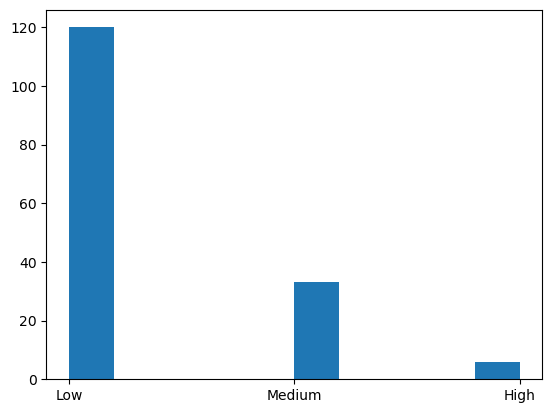

In [46]:
#dividing the column with max of the colum for range 0-1
data['length'] = data['length']/data['length'].max() 
data['width'] = data['width']/data['width'].max() 
data['height'] = data['height']/data['height'].max() 

# binning- grouping values from low to high in three categories- low, medium, high in 'price' column 
bins = np.linspace(min(data['price']), max(data['price']), 4) 
group_names = ['Low', 'Medium', 'High'] 
data['price-binned'] = pd.cut(data['price'], bins, 
							labels = group_names, 
							include_lowest = True) 

print(data['price-binned']) 
plt.hist(data['price-binned']) 
plt.show() 

In [47]:
# categorical to numerical variables using one hot encoding assigning 
# Each row will have a 1 in the column corresponding to its fuel type and 0 in the others.
pd.get_dummies(data['fuel-type']).head() 
  
# descriptive analysis 
# NaN are skipped 
data.describe() 

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,0.851006,0.915029,0.901327,2461.138365,119.226415,10.161132,9.324008,32.081761,11445.729560
std,1.193086,5.167416,0.056876,0.027167,0.037939,481.941321,30.460791,3.889475,2.127124,6.459189,5877.856195
min,-2.000000,86.600000,0.696446,0.841004,0.826087,1488.000000,61.000000,7.000000,4.795918,18.000000,5118.000000
25%,0.000000,94.500000,0.817621,0.892608,0.873746,2065.500000,97.000000,8.700000,7.580645,28.000000,7372.000000
50%,1.000000,96.900000,0.850938,0.912134,0.904682,2340.000000,110.000000,9.000000,9.038462,32.000000,9233.000000
75%,2.000000,100.800000,0.877591,0.927476,0.928094,2809.500000,135.000000,9.400000,10.217391,37.000000,14719.500000
max,3.000000,115.600000,1.000000,1.000000,1.000000,4066.000000,258.000000,23.000000,15.666667,54.000000,35056.000000


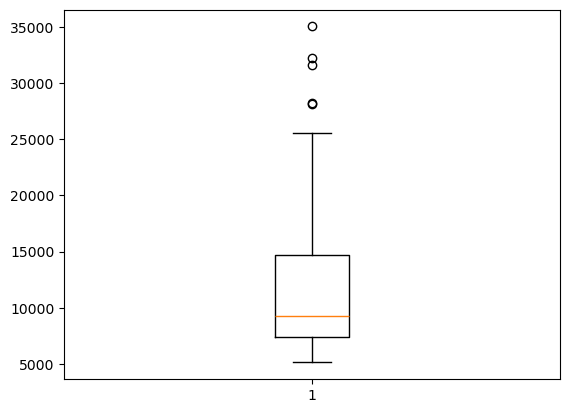

In [48]:
# examples of box plot 
plt.boxplot(data['price']) 
plt.show()

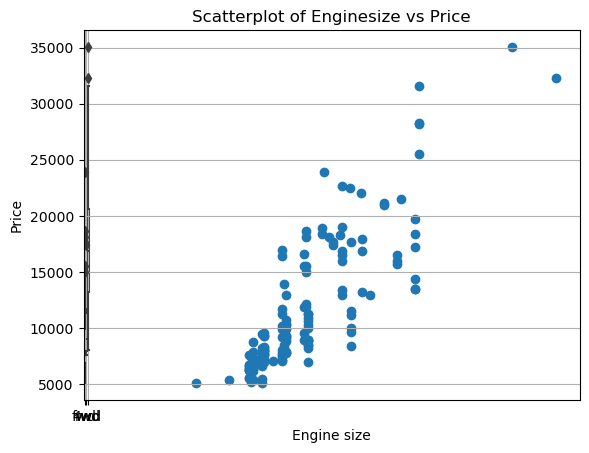

In [49]:
# by using seaborn 
sns.boxplot(x ='drive-wheels', y ='price', data = data) 
  
# Predicting price based on engine size 
# Known on x and predictable on y 
plt.scatter(data['engine-size'], data['price']) 
plt.title('Scatterplot of Enginesize vs Price') 
plt.xlabel('Engine size') 
plt.ylabel('Price') 
plt.grid() 
plt.show() 

In [15]:
# Grouping Data 
test = data[['drive-wheels', 'body-style', 'price']] 
data_grp = test.groupby(['drive-wheels', 'body-style'],  
                         as_index = False).mean() 
  
data_grp 

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [50]:
# pivot method 
data_pivot = data_grp.pivot(index = 'drive-wheels', 
                            columns = 'body-style') 
data_pivot 
  
#This line creates a pivot table from the grouped data, which reorganizes the data so that you can easily see the average price for each
#combination of drive wheel type and body style.

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

C:\Users\DELL\AppData\Local\Temp\ipykernel_1576\625202124.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


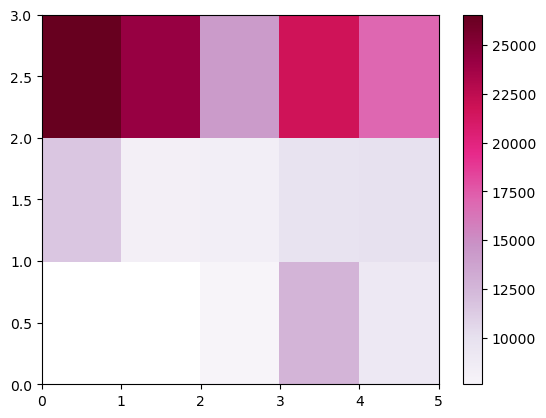

In [51]:
# Visualisation of data
# The color intensity indicates the magnitude of the average prices
plt.pcolor(data_pivot, cmap ='PuRd') 
plt.colorbar() 
plt.show() 

In [24]:
data_annova = data[['make', 'price']] 
data_annova

,make,price
0,alfa-romero,16500
1,alfa-romero,16500
2,audi,13950
3,audi,17450
4,audi,15250
...,...,...
199,volvo,16845
200,volvo,19045
201,volvo,21485
202,volvo,22470


In [25]:
grouped_annova = data_annova.groupby(['make']) 
grouped_annova

In [26]:
annova_results_l = sp.stats.f_oneway( 
                             grouped_annova.get_group('honda')['price'], 
                             grouped_annova.get_group('subaru')['price'] 
                                    ) 
print(annova_results_l) 

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53125.80654065001)

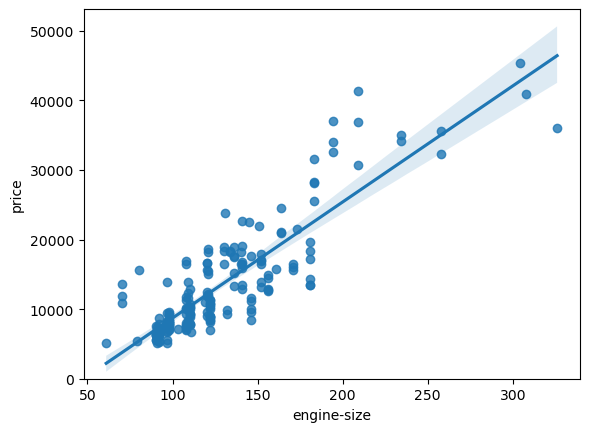

In [27]:
# strong corealtion between a categorical variable 
# if annova test gives large f-test and small p-value 
  
# Correlation- measures dependency, not causation 
sns.regplot(x ='engine-size', y ='price', data = data) 
plt.ylim(0, ) 

In [28]:
# ------------------------------------------------------------------------------------------------------------------------------------------------------